In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Background to Irish Weather Buoy Network data

For this analysis I going to use data from Irish weather buoy network data [[1](https://erddap.marine.ie/erddap/tabledap/IWBNetwork.html)] 
Here I read in dataset and have a peak at the data to see which columns to simulate for the study

In [2]:
waveBuoyReal = pd.read_csv('IWBNetwork_d7a0_c1fd_81c3.csv')

waveBuoyReal.head()

,station_id,CallSign,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,...,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp,QC_Flag
0,NaN,NaN,degrees_east,degrees_north,UTC,mb,degrees_true,kn,kn,m,...,m,degree_C,degree_C,degree_C,PSU,percent,degrees,degrees_true,s,NaN
1,M2,62091.0,-5.4302,53.4836,2019-11-30T00:00:00Z,1019.482,140.0,11.385,15.654,0.586,...,0.703,8.75,NaN,12.441,NaN,64.844,32.344,156.094,2.813,0.0
2,M3,62092.0,-10.548261,51.215956,2019-11-30T00:00:00Z,1007.324,110.0,24.477,33.3,2.344,...,3.281,10.898,NaN,10.859,NaN,87.891,28.125,116.719,5.742,0.0
3,M4,62093.0,-9.999136,54.999967,2019-11-30T00:00:00Z,1017.48,117.0,18.073,22.343,1.758,...,2.109,7.871,NaN,10.781,NaN,NaN,61.875,357.188,9.609,0.0
4,M5,62094.0,-6.704336,51.690425,2019-11-30T00:00:00Z,1015.125,121.0,21.062,26.754,1.563,...,1.875,10.654,NaN,11.865,NaN,85.547,36.563,105.469,5.508,0.0


The head method above shown me that the first rows would not be used for inital analysis for the dataset as these are units. These must be removed 

In [3]:
waveBuoyRealDataSet = waveBuoyReal.iloc[1:]
waveBuoyRealDataSet.head()

,station_id,CallSign,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,...,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp,QC_Flag
1,M2,62091.0,-5.4302,53.4836,2019-11-30T00:00:00Z,1019.482,140.0,11.385,15.654,0.586,...,0.703,8.75,NaN,12.441,NaN,64.844,32.344,156.094,2.813,0.0
2,M3,62092.0,-10.548261,51.215956,2019-11-30T00:00:00Z,1007.324,110.0,24.477,33.3,2.344,...,3.281,10.898,NaN,10.859,NaN,87.891,28.125,116.719,5.742,0.0
3,M4,62093.0,-9.999136,54.999967,2019-11-30T00:00:00Z,1017.48,117.0,18.073,22.343,1.758,...,2.109,7.871,NaN,10.781,NaN,NaN,61.875,357.188,9.609,0.0
4,M5,62094.0,-6.704336,51.690425,2019-11-30T00:00:00Z,1015.125,121.0,21.062,26.754,1.563,...,1.875,10.654,NaN,11.865,NaN,85.547,36.563,105.469,5.508,0.0
5,M6,62095.0,-15.88135,53.07482,2019-11-30T00:00:00Z,1006.978,112.0,19.809,29.145,3.359,...,4.531,10.752,NaN,11.758,NaN,91.113,67.148,143.438,6.797,0.0


### Display distributions for fields of interst to wave height

The fields I use are the following  may discount some as there may be not relationship in the investigation
- station_id String 
- time Datetime
- AtmosphericPressure number
- WindDirection String 
- WindSpeed number
- Gust number 
- WaveHeight number 
- Hmax(Maximum Wave Height) number 
- AirTemperature number
- SeaTemperature number 
- RelativeHumidity number 


I am going to create a histrogram for each field so I can see what distributin if any field is in . First thing I might have to change values for columns are pandas often read in data as generic object types 

In [4]:
realwaveBuoyDataSet = waveBuoyRealDataSet[['station_id','time','AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','Hmax','AirTemperature','SeaTemperature','RelativeHumidity']]
realwaveBuoyDataSet = realwaveBuoyDataSet.dropna(how='any')           # assign back
realwaveBuoyDataSet.dropna(how='any', inplace=True)  # set inplace parameter
realwaveBuoyDataSet.shape

(472, 12)

From above shows that I must change all data types to whatever type they should be 
### Numeric fields 


In [5]:
realwaveBuoyDataSet.iloc[:,0]= realwaveBuoyDataSet.iloc[:,0].astype(str)
realwaveBuoyDataSet.iloc[:,1] = pd.to_datetime(realwaveBuoyDataSet.iloc[:,1],errors='ignore')
realwaveBuoyDataSet.iloc[:,2] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,2],errors='ignore')
realwaveBuoyDataSet.iloc[:,3] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,3],errors='ignore')
realwaveBuoyDataSet.iloc[:,4] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,4],errors='ignore')
realwaveBuoyDataSet.iloc[:,5] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,5],errors='ignore')
realwaveBuoyDataSet.iloc[:,6] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,6],errors='ignore')
realwaveBuoyDataSet.iloc[:,7] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,7],errors='ignore')
realwaveBuoyDataSet.iloc[:,8] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,8],errors='ignore')
realwaveBuoyDataSet.iloc[:,9] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,9],errors='ignore')
realwaveBuoyDataSet.iloc[:,10] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,10],errors='ignore')
realwaveBuoyDataSet.iloc[:,11] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,11],errors='ignore')
realwaveBuoyDataSet.dtypes

station_id                          object
time                   datetime64[ns, UTC]
AtmosphericPressure                float64
WindDirection                      float64
WindSpeed                          float64
Gust                               float64
WaveHeight                         float64
WavePeriod                         float64
Hmax                               float64
AirTemperature                     float64
SeaTemperature                     float64
RelativeHumidity                   float64
dtype: object

#### Histrogram of Atmoseric pressure 

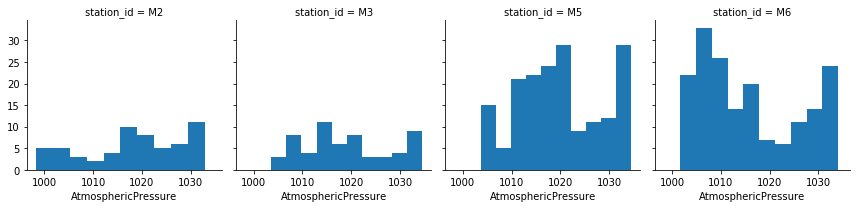

In [6]:

g = sns.FacetGrid(realwaveBuoyDataSet , col="station_id")
g = g.map(plt.hist, "AtmosphericPressure")
g

### Wind direction

First thing this going to be a categorical varaible 

In [7]:

def deg_to_text(deg):
    return ["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"][round(deg/22.5)%16]

realwaveBuoyDataSet['WindDirection'] = realwaveBuoyDataSet['WindDirection'].round()

realwaveBuoyDataSet['WindDirection'] =realwaveBuoyDataSet['WindDirection'].apply(deg_to_text)


### Histrogram of Wind speed 

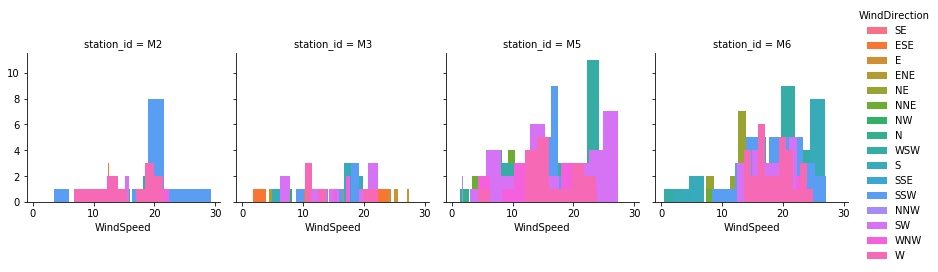

In [8]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "WindSpeed").add_legend()
g



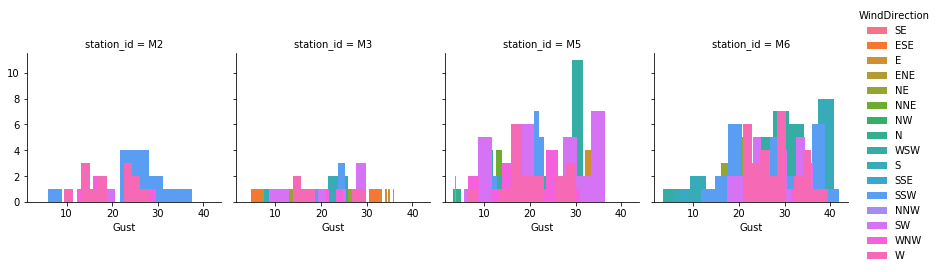

In [10]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "Gust").add_legend()
g

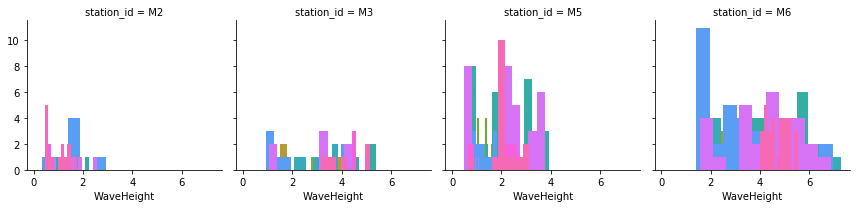

In [11]:
g = sns.FacetGrid(realwaveBuoyDataSet,hue = 'WindDirection' , col="station_id")
g = g.map(plt.hist, "WaveHeight")


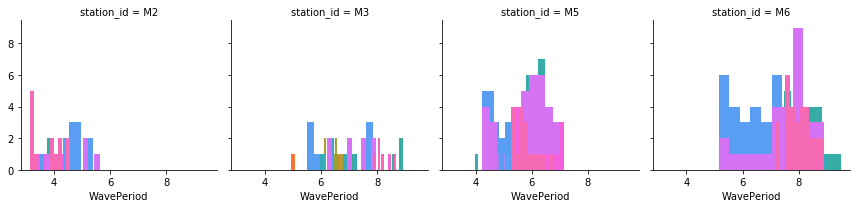

In [12]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "WavePeriod")

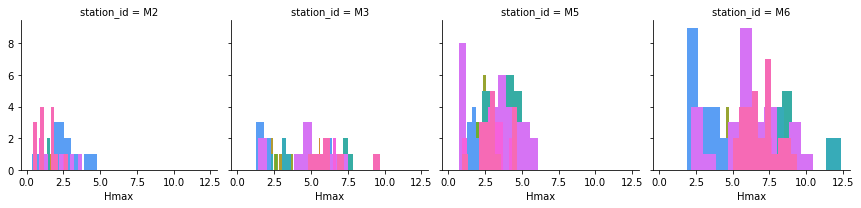

In [13]:
g = sns.FacetGrid(realwaveBuoyDataSet,hue = 'WindDirection' , col="station_id")
g = g.map(plt.hist, "Hmax")

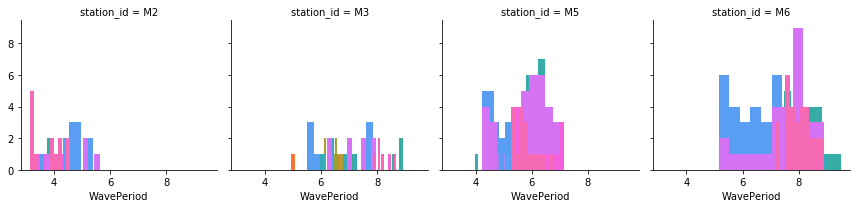

In [14]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "WavePeriod")

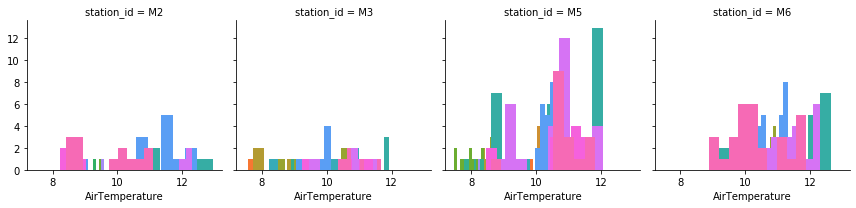

In [15]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "AirTemperature")

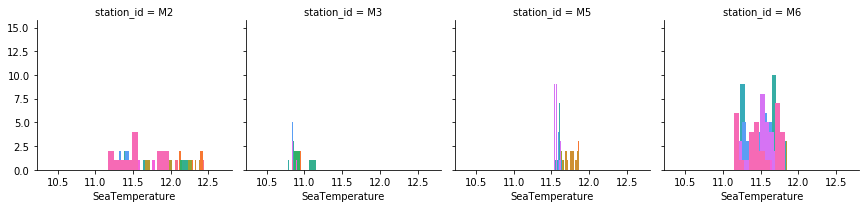

In [16]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "SeaTemperature")

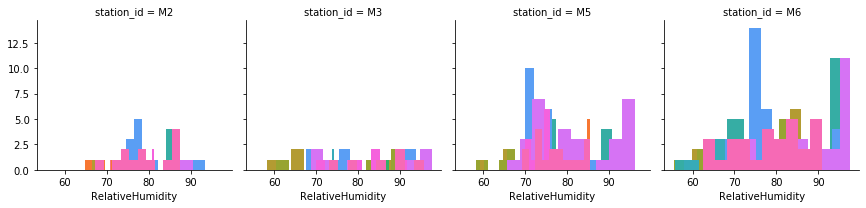

In [17]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "RelativeHumidity")

After creating the histrograms and checking the distribution it was decided only use data from M6 as data where follow poisson or noraml distribution in most cases 

In [18]:
realwaveBuoyDataSetM6 = realwaveBuoyDataSet.where(realwaveBuoyDataSet['station_id'] == "M6")
del realwaveBuoyDataSetM6['station_id']

allfilters = (realwaveBuoyDataSet['WindDirection'] == "S")  |(realwaveBuoyDataSet['WindDirection'] == "SW")
allfilters = allfilters  | (realwaveBuoyDataSet['WindDirection'] == "W") |  (realwaveBuoyDataSet['WindDirection'] == "WNW")

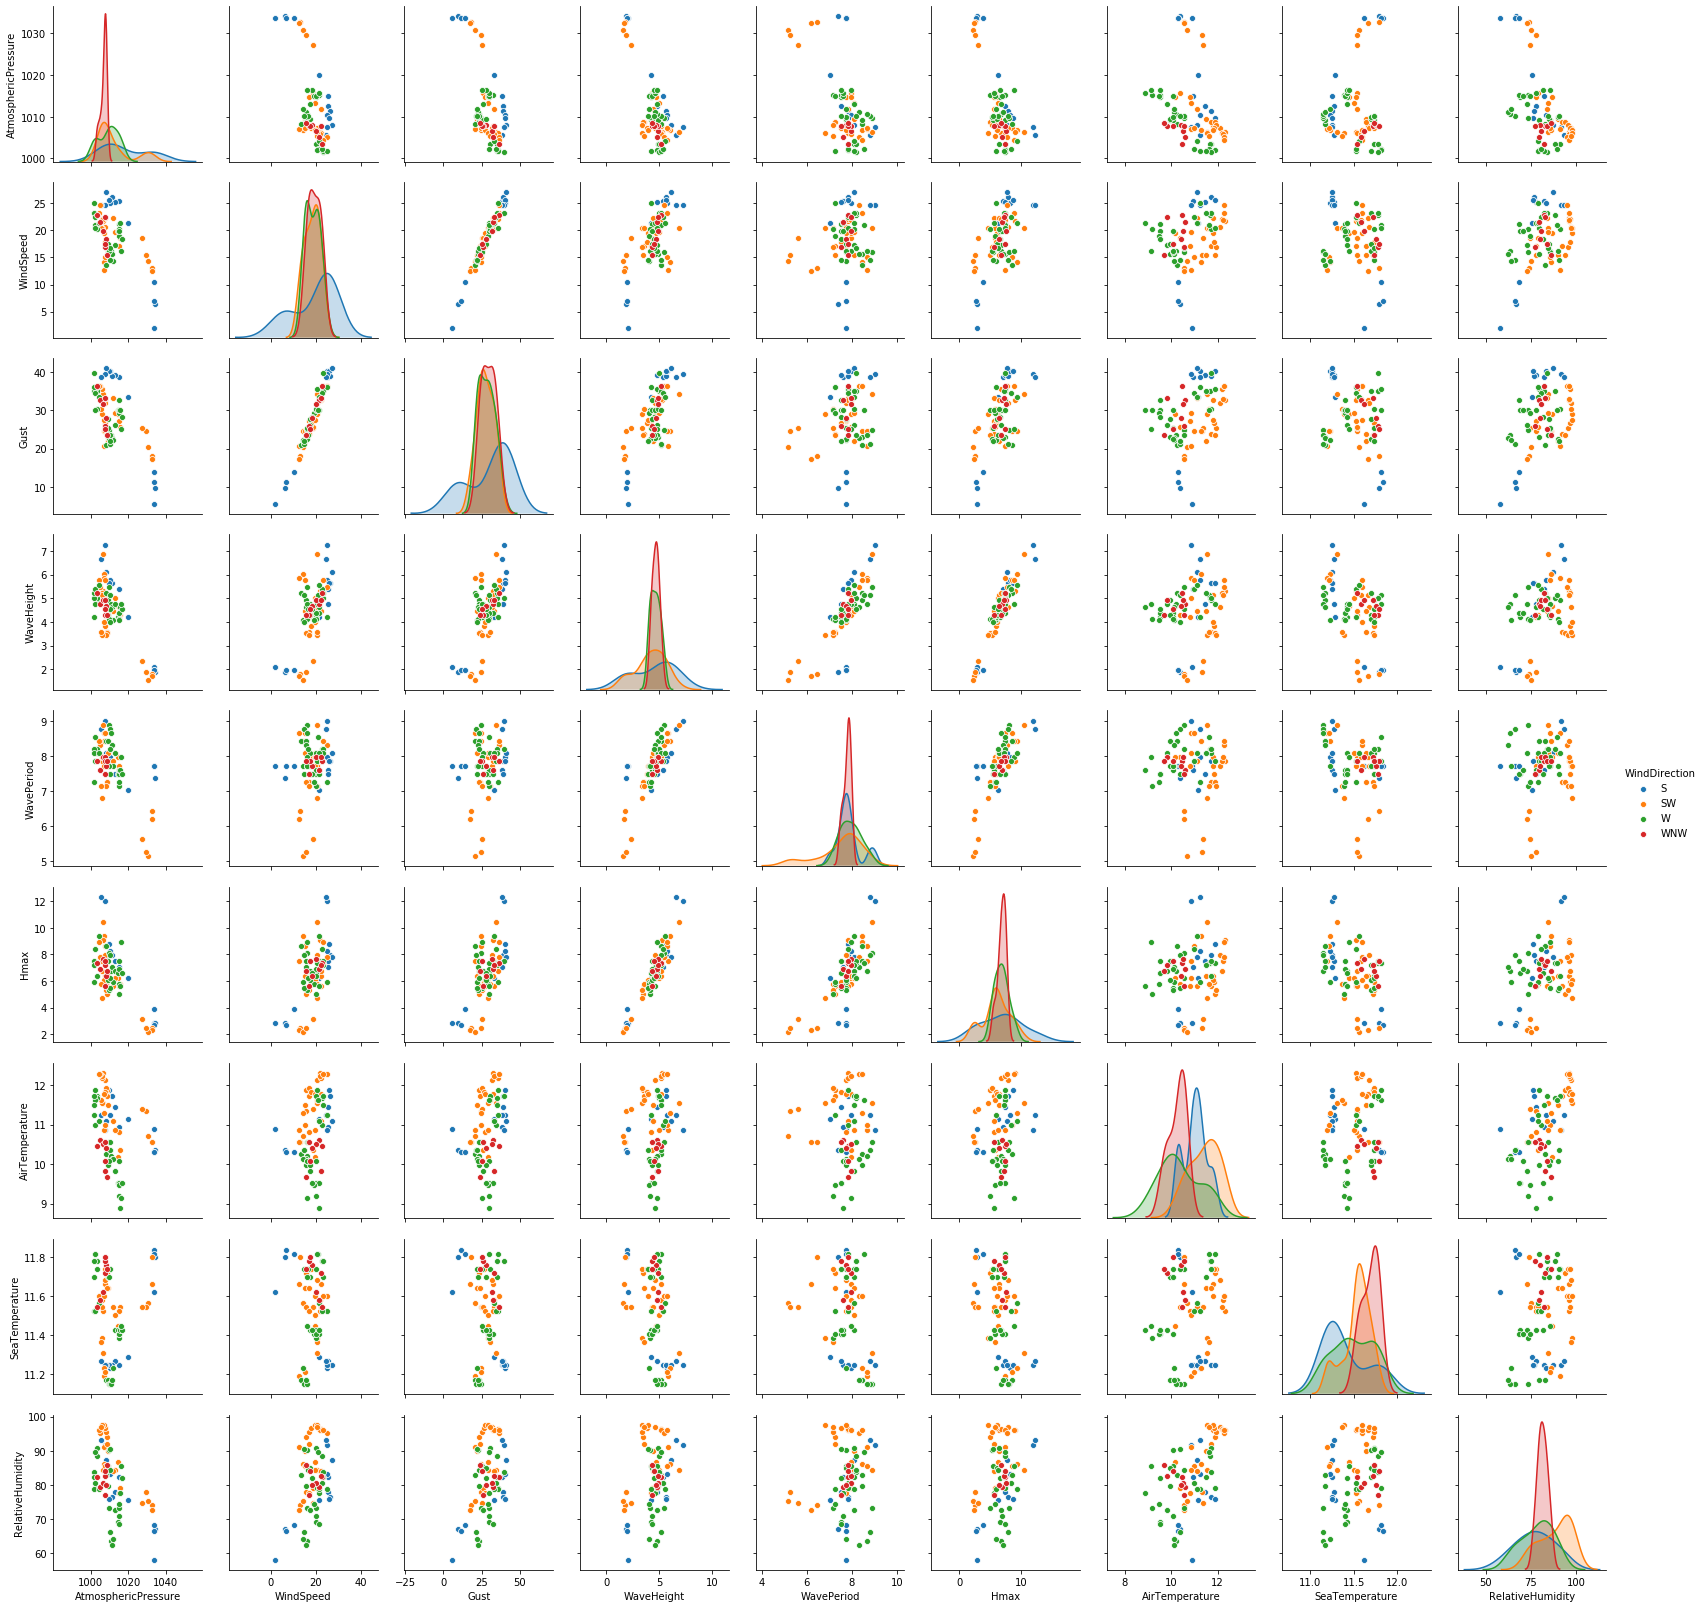

In [19]:
sns.pairplot(realwaveBuoyDataSetM6.where(allfilters), hue="WindDirection")

### Create simulated Dataset

First thing to do is the get the descriptive statistics for the data for each wind direction for simulated dataset 






In [20]:
print("Number of west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "W")))
print("Number of south is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "S")))
print("Number of south west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "SW")))
print("Number of west north west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "WNW")))

Number of west is 66
Number of south is 20
Number of south west is 73
Number of west north west is 31


In [21]:
total = 60 + 20 + 73 + 31
print("Percentage of west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "W")/total))
print("Percentage of south is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "S")/total))
print("Percentage of south west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "SW")/total))
print("Percentage of west north west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "WNW")/total))

Percentage of west is 0.358695652173913
Percentage of south is 0.10869565217391304
Percentage of south west is 0.3967391304347826
Percentage of west north west is 0.16847826086956522


-  For data 35% of the data will have ditrubtion for west
-  For data 10% of the data will have ditrubtion for south
-  For data 16% of the data will have ditrubtion for south west
-  For data 39% of the data will have ditrubtion for west north west


### Descriptive statistics for south direction 

In [22]:
realwaveBuoyDataSetM6.where((realwaveBuoyDataSet['WindDirection'] == "S")).describe()


,AtmosphericPressure,WindSpeed,Gust,WaveHeight,WavePeriod,Hmax,AirTemperature,SeaTemperature,RelativeHumidity
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1018.103538,19.301538,29.985538,4.561385,7.869538,6.935154,11.033769,11.413769,77.208538
std,11.438579,9.146731,13.997298,1.945598,0.534522,3.220204,0.500399,0.250775,10.440675
min,1005.562000,2.049000,5.692000,1.875000,7.031000,2.656000,10.313000,11.230000,58.008000
25%,1009.761000,10.474000,13.889000,2.109000,7.617000,3.906000,10.850000,11.250000,68.262000
50%,1012.691000,24.705000,38.594000,5.391000,7.734000,7.500000,11.094000,11.270000,76.563000
75%,1033.638000,25.388000,39.505000,5.781000,7.969000,8.281000,11.240000,11.621000,83.301000
max,1034.029000,26.982000,40.871000,7.266000,9.023000,12.344000,11.875000,11.836000,93.164000


### Descriptive statistics for south west  direction¶

In [23]:
realwaveBuoyDataSetM6.where((realwaveBuoyDataSet['WindDirection'] == "SW")).describe()

,AtmosphericPressure,WindSpeed,Gust,WaveHeight,WavePeriod,Hmax,AirTemperature,SeaTemperature,RelativeHumidity
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1012.199586,18.368690,27.613897,4.243069,7.520241,6.115414,11.427172,11.538966,88.510241
std,9.020857,3.406538,5.349383,1.406147,0.979110,2.175797,0.626912,0.158439,8.534396
min,1004.439000,12.523000,17.305000,1.563000,5.156000,2.188000,10.166000,11.191000,72.559000
25%,1006.295000,15.483000,24.477000,3.516000,7.148000,5.313000,10.850000,11.504000,83.984000
50%,1007.857000,18.557000,27.323000,4.453000,7.852000,6.094000,11.533000,11.543000,91.113000
75%,1014.791000,20.606000,32.560000,5.234000,8.086000,7.500000,11.875000,11.641000,96.094000
max,1032.613000,24.705000,36.317000,6.875000,8.906000,10.469000,12.314000,11.797000,97.656000


### Descriptive statistics for west direction¶

In [24]:
realwaveBuoyDataSetM6.where((realwaveBuoyDataSet['WindDirection'] == "W")).describe()

,AtmosphericPressure,WindSpeed,Gust,WaveHeight,WavePeriod,Hmax,AirTemperature,SeaTemperature,RelativeHumidity
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000
mean,1009.343267,18.682467,28.370833,4.682367,7.953133,6.89600,10.375933,11.493333,78.444067
std,5.094898,3.148200,5.209351,0.460498,0.462413,1.11975,0.856609,0.229348,8.566778
min,1001.656000,13.662000,20.948000,3.984000,7.148000,5.00000,8.896000,11.152000,62.402000
25%,1003.731000,16.081250,23.566000,4.238500,7.617000,5.97700,9.860750,11.391750,72.778250
50%,1010.079000,18.728000,28.746500,4.687500,7.910500,6.79700,10.166000,11.435500,79.443500
75%,1014.290250,21.147500,32.161750,5.000000,8.203000,7.50000,11.069500,11.728250,84.765500
max,1016.500000,25.046000,39.619000,5.547000,8.906000,9.37500,11.875000,11.816000,90.918000


### Descriptive statistics for west north west direction¶

In [25]:
realwaveBuoyDataSetM6.where((realwaveBuoyDataSet['WindDirection'] == "WNW")).describe()


,AtmosphericPressure,WindSpeed,Gust,WaveHeight,WavePeriod,Hmax,AirTemperature,SeaTemperature,RelativeHumidity
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1006.905000,19.353875,29.600375,4.707125,7.793125,6.914125,10.263625,11.691875,81.469750
std,1.710876,2.750589,4.555255,0.325400,0.165918,0.666876,0.357854,0.096209,2.785575
min,1003.560000,15.483000,23.680000,4.297000,7.500000,5.625000,9.678000,11.543000,77.051000
25%,1006.172500,17.276500,25.757750,4.472500,7.704750,6.640750,10.007000,11.611250,79.785250
50%,1007.784000,19.126000,29.771500,4.727000,7.852000,7.031500,10.434500,11.728500,81.396500
75%,1007.906000,21.744750,32.902000,4.922000,7.881250,7.383000,10.520250,11.762750,83.032250
max,1008.492000,22.883000,36.431000,5.234000,7.969000,7.656000,10.605000,11.797000,85.840000


### Simulate data set 

The following fields will be used for the data set 
- Wind Direction 
- WindSpeed
- Gust
- WaveHeight
- WavePeriod
- Hmax
- AirTemperature
- SeaTemperature
- RelativeHumidity

#### Field Wind Direction 


Here i create a list of each wind direction percentage are as per stats above 

In [26]:
wind_DirectionW = []
for x in range(350):
  wind_DirectionW.append('W')
wind_DirectionS = []
for x in range(100):
  wind_DirectionS.append('S')
wind_DirectionSW = []
for x in range(390):
  wind_DirectionSW.append('SW')
wind_DirectionWNW = []
for x in range(160):
  wind_DirectionWNW.append('WNW')


#### Field WindSpeed

In [27]:
# West

WindSpeedW = np.random.normal(18.682467, 3.148200, 350)


# South

WindSpeedS = np.random.normal(19.301538, 9.146731, 100)

# south west

WindSpeedSW = np.random.normal(18.368690, 3.406538, 390)

#  west north west

WindSpeedWNW = np.random.normal(19.353875, 2.750589, 160)



#### Field Gust

In [28]:
# West

GustW = np.random.normal(28.370833, 5.209351, 350)


# South

GustS = np.random.normal(29.985538, 13.997298, 100)

# south west

GustSW = np.random.normal(27.613897, 5.349383, 390)

#  west north west

GustWNW = np.random.normal(29.600375, 4.555255, 160)

#### Field WaveHeight

In [29]:
# West

WaveHeightW = np.random.normal(4.682367,0.460498, 350)


# South

WaveHeightS = np.random.normal(4.561385, 1.945598, 100)

# south west

WaveHeightSW = np.random.normal(4.243069, 1.406147, 390)

#  west north west

WaveHeightWNW = np.random.normal(4.707125, 0.325400, 160)

#### Field Wave Period 

In [30]:
# West 
# mean 7.953133	6.89600	10.375933	11.493333	78.444067
# std 0.462413	1.11975	0.856609	0.229348	8.56677
WavePeriodW = np.random.normal(7.953133,0.462413, 350)


# South
# mean 7.869538	6.935154	11.033769	11.413769	77.208538
# std 0.534522	3.220204	0.500399	0.250775	10.440675
WavePeriodS = np.random.normal(7.869538, 0.534522, 100)

# south west
# mean 7.520241	6.115414	11.427172	11.538966	88.510241
#std 0.979110	2.175797	0.626912	0.158439	8.534396
WavePeriodSW = np.random.normal(7.520241, 0.979110, 390)

#  west north west
# mean 7.793125	6.914125	10.263625	11.691875	81.469750
# std 0.165918	0.666876	0.357854	0.096209	2.785575
WavePeriodWNW = np.random.normal(7.793125, 0.165918, 160)

#### Field Hmax

In [31]:
# West 
# mean 7.953133	6.89600	10.375933	11.493333	78.444067
# std 0.462413	1.11975	0.856609	0.229348	8.56677
HmaxW = np.random.normal(6.89600,1.11975, 350)


# South
# mean 7.869538	6.935154	11.033769	11.413769	77.208538
# std 0.534522	3.220204	0.500399	0.250775	10.440675
HmaxS = np.random.normal(6.935154, 3.220204, 100)

# south west
# mean 7.520241	6.115414	11.427172	11.538966	88.510241
#std 0.979110	2.175797	0.626912	0.158439	8.534396
HmaxSW = np.random.normal(6.115414, 2.175797, 390)

#  west north west
# mean 7.793125	6.914125	10.263625	11.691875	81.469750
# std 0.165918	0.666876	0.357854	0.096209	2.785575
HmaxWNW = np.random.normal(6.914125,0.666876, 160)

#### Field AirTemperature

In [32]:
# West 
# mean 10.375933	11.493333	78.444067
# std 1.11975	0.856609	0.229348	8.56677
AirTemperatureW = np.random.normal(10.375933,1.11975, 350)


# South
# mean 11.033769	11.413769	77.208538
# std 0.500399	0.250775	10.440675
AirTemperatureS = np.random.normal(11.033769,0.500399, 100)

# south west
# mean 11.427172	11.538966	88.510241
#std 0.626912	0.158439	8.534396
AirTemperatureSW = np.random.normal(11.427172, 0.626912, 390)

#  west north west
# mean 10.263625	11.691875	81.469750
# std 0.357854	0.096209	2.785575
AirTemperatureWNW = np.random.normal(10.263625,0.357854, 160)

#### Field SeaTemperature

In [33]:
# West 
# mean 1.493333	78.444067
# std 0.856609	0.229348	8.56677
SeaTemperatureW = np.random.normal(11.493333,0.856609, 350)


# South
# mean 11.413769	77.208538
# std 0.250775	10.440675
SeaTemperatureS = np.random.normal(11.413769,0.250775, 100)

# south west
# mean 11.538966	88.510241
#std 0.158439	8.534396
SeaTemperatureSW = np.random.normal(11.538966, 0.158439, 390)

#  west north west
# mean 11.691875	81.469750
# std 0.096209	2.785575
SeaTemperatureWNW = np.random.normal(11.691875,0.096209, 160)

#### Field RelativeHumidity

In [34]:
# West 
# mean 1.493333	78.444067
# std 0.856609	0.229348	8.56677
RelativeHumidityW = np.random.normal(78.444067,8.56677, 350)


# South
# mean 11.413769	77.208538
# std 0.250775	10.440675
RelativeHumidityS = np.random.normal(77.208538,10.440675, 100)

# south west
# mean 11.538966	88.510241
#std 0.158439	8.534396
RelativeHumiditySW = np.random.normal(88.510241,8.534396, 390)

#  west north west
# mean 11.691875	81.469750
# std 0.096209	2.785575
RelativeHumidityWNW = np.random.normal(81.469750,2.785575, 160)

In [35]:
# First work with west data set 
# create a series for each of the varaibles 
wind_direction = pd.Series(wind_DirectionW)
wind_Speed = pd.Series(WindSpeedW)
gust= pd.Series(GustW)
wave_Height= pd.Series(WaveHeightW)
wave_Period= pd.Series(WavePeriodW)
Hmax = pd.Series(HmaxW)
air_Temperature= pd.Series(AirTemperatureW)
sea_Temperature= pd.Series(SeaTemperatureW)
relative_Humidity= pd.Series(RelativeHumidityW)

dataSet_west = { 'wind_direction': wind_direction,
                'wind_Speed': wind_Speed ,
                'gust': gust,
               'wave_Height':wave_Height,
                'wave_Period':wave_Period,
                'Hmax':Hmax,
                'air_Temperature':air_Temperature,
                'sea_Temperature':sea_Temperature,
                'relative_Humidity':relative_Humidity
                
               } 
    
dataSet_west = pd.DataFrame.from_dict(dataSet_west)


wind_direction = pd.Series(wind_DirectionS)
wind_Speed = pd.Series(WindSpeedS)
gust= pd.Series(GustS)
wave_Height= pd.Series(WaveHeightS)
wave_Period= pd.Series(WavePeriodS)
Hmax = pd.Series(HmaxS)
air_Temperature= pd.Series(AirTemperatureS)
sea_Temperature= pd.Series(SeaTemperatureS)
relative_Humidity= pd.Series(RelativeHumidityS)

dataSet_south = { 'wind_direction': wind_direction,
                'wind_Speed': wind_Speed ,
                'gust': gust,
                'wave_Height':wave_Height,
                'wave_Period':wave_Period,
                'Hmax':Hmax,
                'air_Temperature':air_Temperature,
                'sea_Temperature':sea_Temperature,
                'relative_Humidity':relative_Humidity
                
               } 

dataSet_south = pd.DataFrame.from_dict(dataSet_south)


wind_direction = pd.Series(wind_DirectionSW)
wind_Speed = pd.Series(WindSpeedSW)
gust= pd.Series(GustSW)
wave_Height= pd.Series(WaveHeightSW)
wave_Period= pd.Series(WavePeriodSW)
Hmax = pd.Series(HmaxSW)
air_Temperature= pd.Series(AirTemperatureSW)
sea_Temperature= pd.Series(SeaTemperatureSW)
relative_Humidity= pd.Series(RelativeHumiditySW)

dataSet_southWest = { 'wind_direction': wind_direction,
                'wind_Speed': wind_Speed ,
                'gust': gust,
                'wave_Height':wave_Height,
                'wave_Period':wave_Period,
                'Hmax':Hmax,
                'air_Temperature':air_Temperature,
                'sea_Temperature':sea_Temperature,
                'relative_Humidity':relative_Humidity
                
               }

dataSet_southWest = pd.DataFrame.from_dict(dataSet_southWest)

wind_direction = pd.Series(wind_DirectionWNW)
wind_Speed = pd.Series(WindSpeedWNW)
gust= pd.Series(GustWNW)
wave_Height= pd.Series(WaveHeightWNW)
wave_Period= pd.Series(WavePeriodWNW)
Hmax = pd.Series(HmaxWNW)
air_Temperature= pd.Series(AirTemperatureWNW)
sea_Temperature= pd.Series(SeaTemperatureWNW)
relative_Humidity= pd.Series(RelativeHumidityWNW)

dataSet_westNorthWest = { 'wind_direction': wind_direction,
                'wind_Speed': wind_Speed ,
                'gust': gust,
                'wave_Height':wave_Height,
                'wave_Period':wave_Period,
                'Hmax':Hmax,
                'air_Temperature':air_Temperature,
                'sea_Temperature':sea_Temperature,
                'relative_Humidity':relative_Humidity
                
               }

dataSet_westNorthWest = pd.DataFrame.from_dict(dataSet_westNorthWest)
frames = [dataSet_west, dataSet_south, dataSet_southWest,dataSet_westNorthWest]

result = pd.concat(frames)
result = shuffle(result)
result

,wind_direction,wind_Speed,gust,wave_Height,wave_Period,Hmax,air_Temperature,sea_Temperature,relative_Humidity
42,S,7.639182,18.249839,4.238679,8.528235,4.978264,11.572876,11.547931,98.668039
181,SW,20.700181,31.565517,3.041360,7.065409,6.103505,12.190136,11.836457,88.596041
195,SW,18.117049,28.510019,5.879325,8.750238,6.785613,10.597457,11.514350,97.448940
81,SW,18.263101,27.785908,4.363478,6.828832,4.651628,10.264774,11.305198,86.993994
135,SW,26.677444,30.313306,4.677333,7.953752,7.486620,11.570434,11.562559,100.536141
...,...,...,...,...,...,...,...,...,...
84,WNW,22.838922,24.475733,4.842176,7.642290,6.427232,10.546597,11.694671,80.232155
139,WNW,22.902010,28.673061,4.893398,7.747107,6.733393,10.765010,11.593222,76.983664
89,WNW,18.330403,25.992762,4.417171,7.682432,6.707618,10.060015,11.826937,84.099141
69,SW,22.079528,24.436410,4.406039,7.794184,7.558796,10.944926,11.264552,91.958416


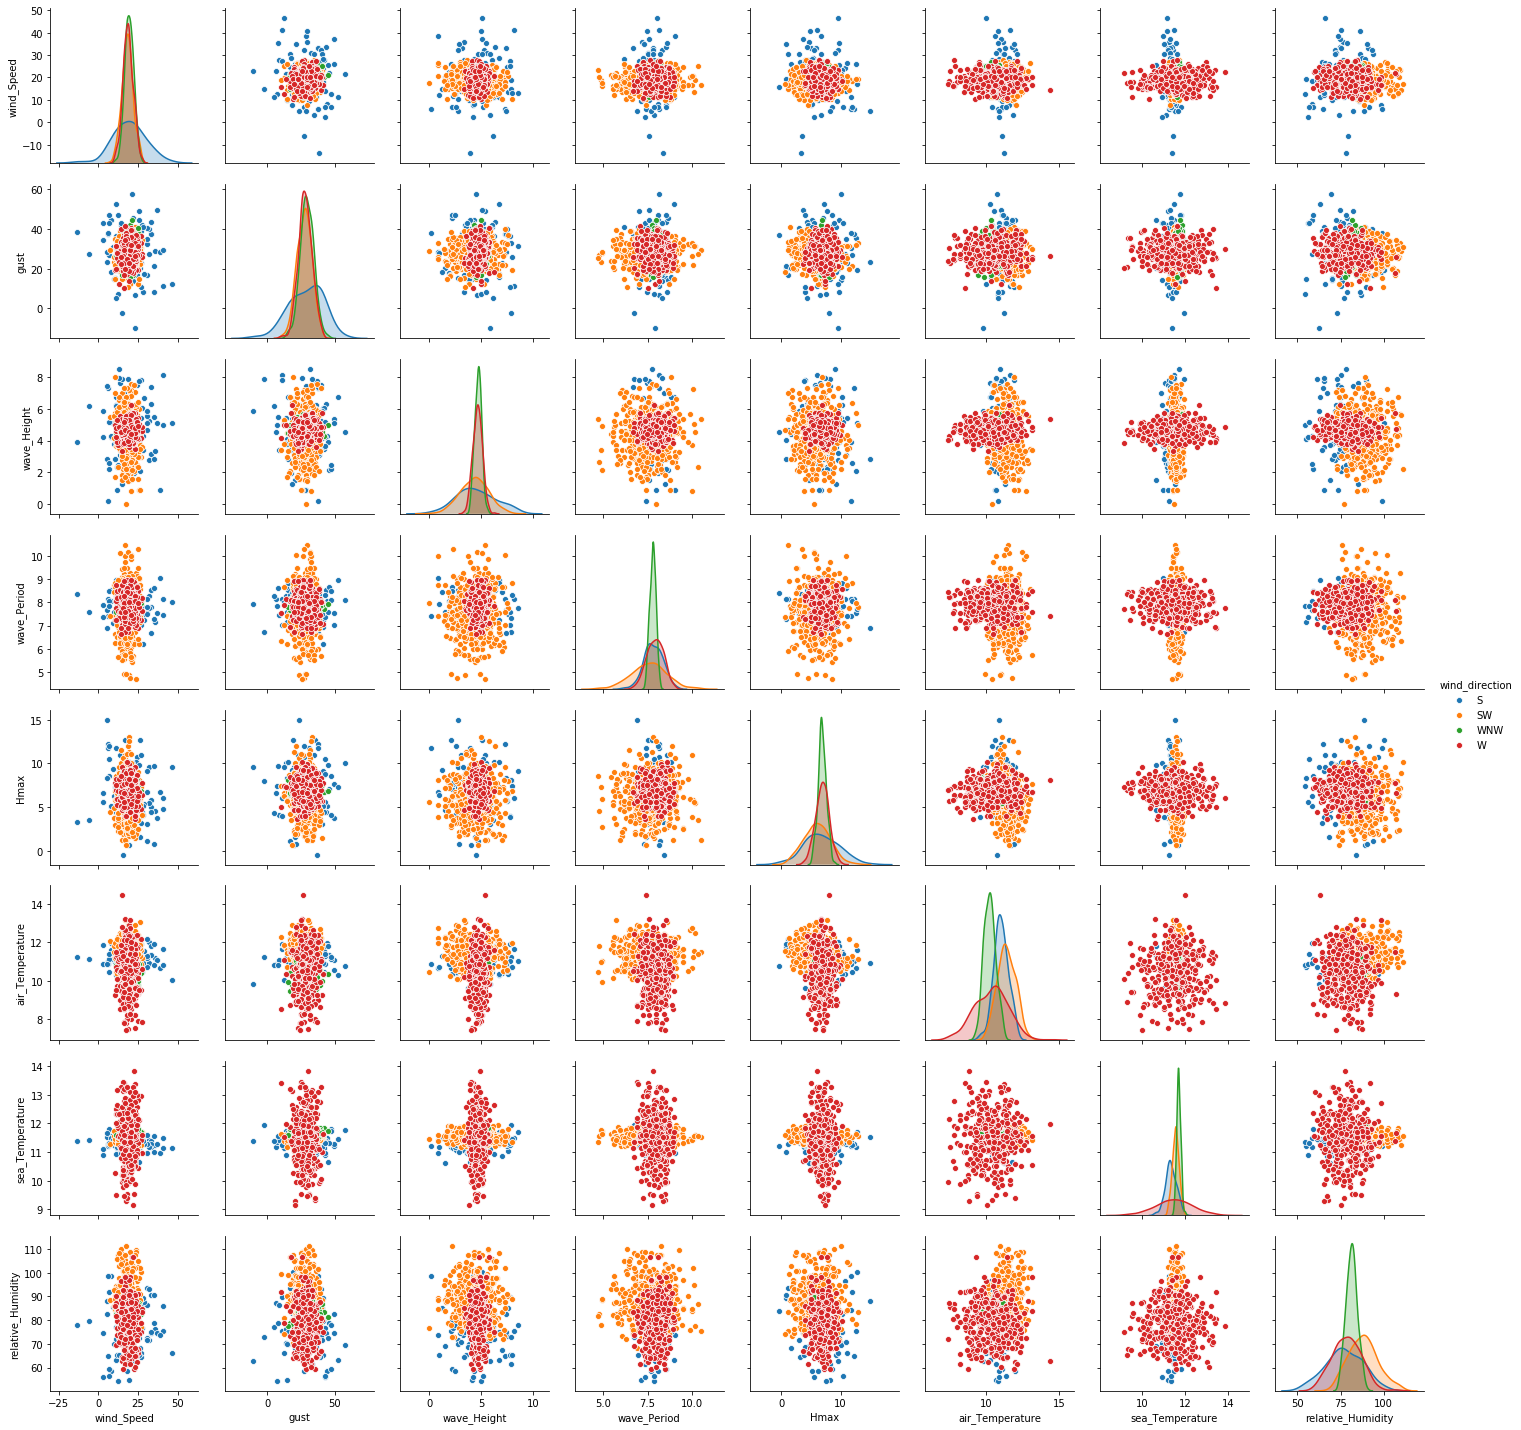

In [36]:
sns.pairplot(result, hue="wind_direction")

In [37]:
X = result.drop(columns=['wind_direction'])
y = result['wind_direction'].values
y
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
knn.predict(X_test)[0:5]
knn.score(X_test, y_test)

0.56

In [38]:
cv_scores = cross_val_score(knn, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
np.mean(cv_scores)

[0.59  0.555 0.57  0.575 0.6  ]


0.5780000000000001

In [39]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
knn_gscv.best_params_

{'n_neighbors': 6}

In [41]:
knn_gscv.best_score_

0.624

### References 

1. Marine Insitude, Data Access Form, Dataset Title: Irish Weather Buoy Network https://erddap.marine.ie/erddap/tabledap/IWBNetwork.html

2. Stackoverflow, Converting wind direction in angles to text words, https://stackoverflow.com/questions/7490660/converting-wind-direction-in-angles-to-text-words

3. Stackoverflow, Shuffle DataFrame rows, https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
4. Eijaz Allibhai,Building a k-Nearest-Neighbors (k-NN) Model with Scikit-learn, https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a